In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import colorsys

from scripts import *
from sklearn.cluster import MiniBatchKMeans
from tqdm import tqdm

plt.rcParams['figure.figsize'] = 20, 5

# Paleta de Analisis

In [3]:
steps = 20
limit = 100

paleta_luminancia = np.array([
    (250/360, i/limit, 0)
    for i in range(0, limit, int(limit/steps))
])

In [4]:
def preprocess_luminance(img_hls):
    return img_hls * (0, 1/255, 0)

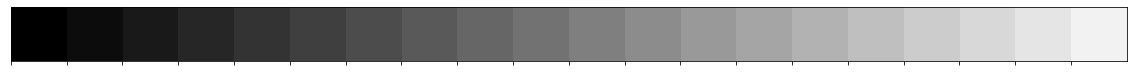

In [5]:
sns.palplot(get_palette(paleta_luminancia))

# Carga archivos

In [6]:
cam = glob.glob('../../../Osintgram/output/*.jpg')

In [27]:
saturation_imgs = []
for img_path in cam:
    img_rgb, img_hls = get_img(img_path)
    
    median_saturation = np.mean(img_hls[:,:,2].flatten())
    
    saturation_imgs.append(median_saturation)

In [29]:
pd_saturations = pd.Series(saturation_imgs).to_frame().rename(columns={0: 'saturation'})

array([[<AxesSubplot:title={'center':'saturation'}>]], dtype=object)

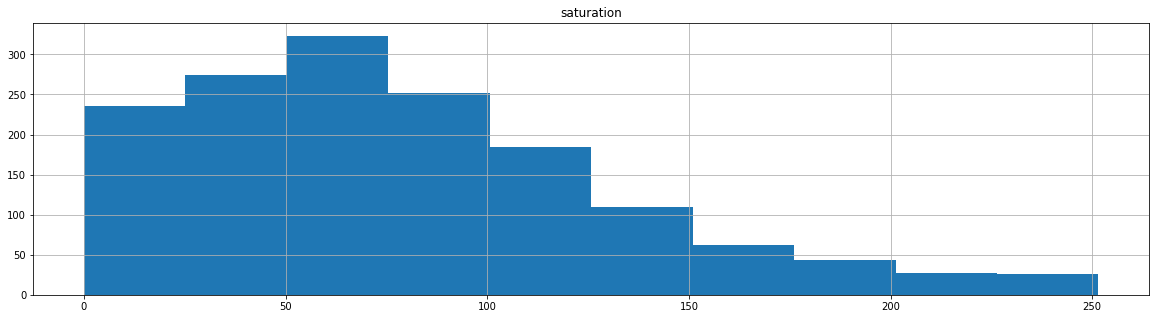

In [39]:
pd_saturations.hist()

In [30]:
pd_saturations['q_saturation'] = pd.qcut(pd_saturations['saturation'], q=4)

In [37]:
pd_saturations.groupby('q_saturation').sample(1)

,saturation,q_saturation
442,13.628033,"(-0.001, 40.005]"
1457,53.138038,"(40.005, 71.194]"
1006,106.508776,"(71.194, 108.974]"
472,113.552180,"(108.974, 251.548]"


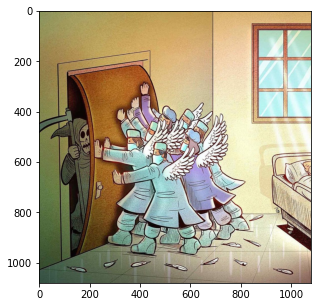

In [42]:
img_idx = 472

plt.imshow(get_img(cam[img_idx])[0])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

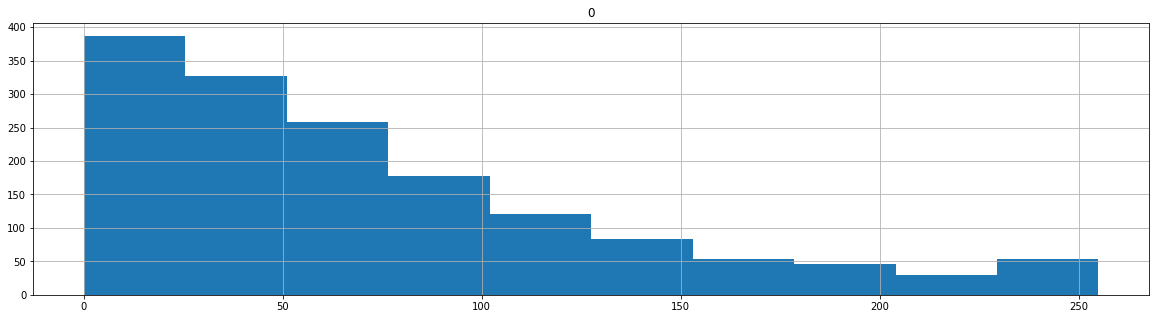

In [11]:
.hist()

In [10]:
signatures = get_image_signatures(cam, preprocess=preprocess_luminance, analysis_palette=paleta_luminancia)

100%|██████████| 1537/1537 [02:33<00:00,  9.98it/s]


In [11]:
pd_signatures = pd.DataFrame(signatures)

In [12]:
pd_weighted_signatures = pd_signatures.apply(lambda x: x/x.sum(), axis=1)

<AxesSubplot:>

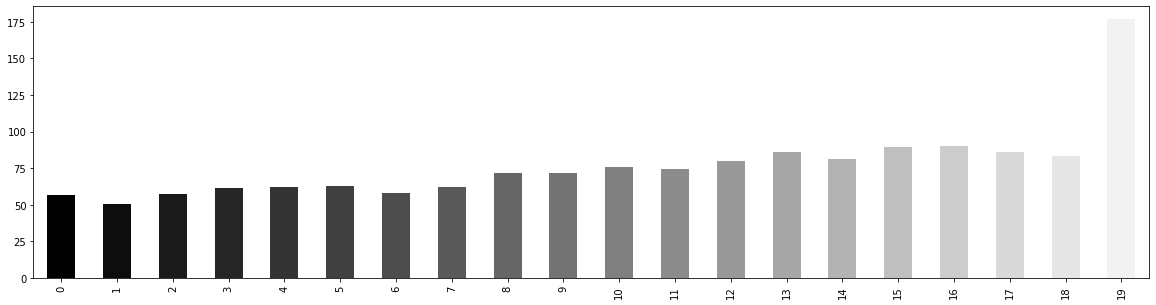

In [13]:
pd_weighted_signatures.sum(axis=0).plot.bar(color=get_palette(paleta_luminancia))

<AxesSubplot:>

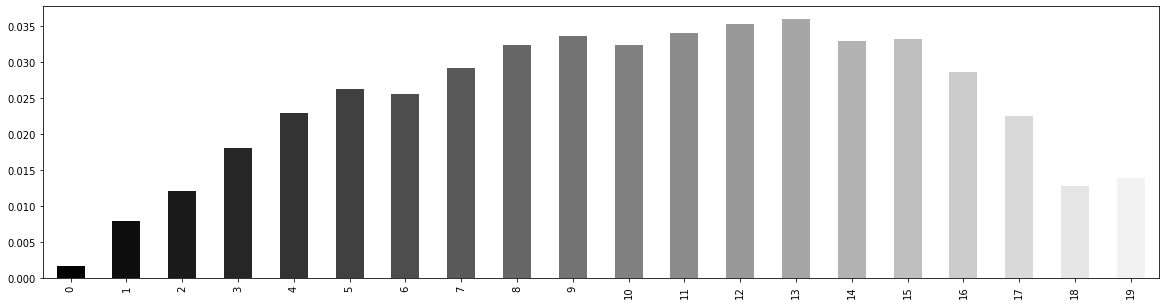

In [14]:
pd_weighted_signatures.median(axis=0).plot.bar(color=get_palette(paleta_luminancia))

# Pruebas Luminancia y posicion

In [23]:
def quantize_img_color_wheel(img_hls, palette=np_itten_color_wheel):
    shape = img_hls.shape
    palette_index_matrix = get_color_wheel_quantized_img(img_hls, palette)
    
    return np.take(palette, palette_index_matrix.reshape(-1), axis=0).reshape(shape[0], shape[1], 3)

In [31]:
img = cam[0]
img_rgb, img_hls = get_img(img)

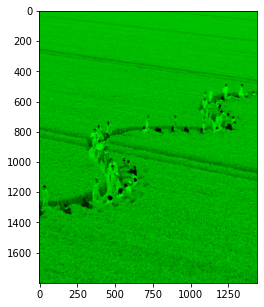

In [33]:
plt.imshow(preprocess_luminance(img_hls), cmap='gray')